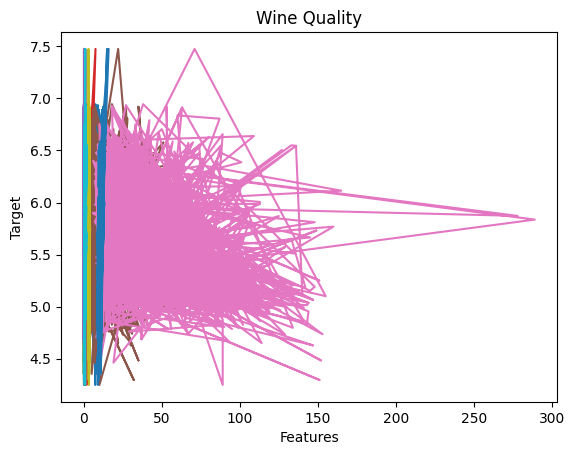

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
wine_data = pd.read_csv('C:\\Users\\solomon kure\\Desktop\\winequality-red.csv')
wine_data.head()
X = wine_data.drop(columns = ['quality']).values
#X_1 = X.reshape(-1,1)
y = wine_data['quality'].values
reg = LinearRegression()
reg.fit(X,y)
prediction = reg.predict(X)
#plt.scatter(X,y)
plt.plot(X,prediction)
plt.xlabel('Features')
plt.ylabel('Target')
plt.title('Wine Quality')
plt.show()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 25,test_size = .3)
reg_all = LinearRegression()
reg_all.fit(X_train,y_train)
y_pred = reg_all.predict(X_test)
#wine_data.info()
#print(type(X),type(y))

In [5]:
# To calculate the RMSE(Root Mean Square Error)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.4078799451289304

In [6]:
# For performing cross-validation 
from sklearn.model_selection import cross_val_score,KFold
kf = KFold(n_splits = 6,shuffle = True , random_state = 17)
reg = LinearRegression()
cv_results = cross_val_score(reg,X,y,cv = kf)
cv_results

array([0.396051  , 0.37360077, 0.30132392, 0.38635281, 0.31306186,
       0.3285802 ])

In [7]:
print(np.mean(cv_results),np.std(cv_results))

0.3498284278354407 0.036949595400957526


In [8]:
print(np.quantile(cv_results,[.025,.975]))

[0.30279117 0.39483873]


In [10]:
# Lets try Regulirization to avoid overfitting in our model
# Lets try Ridge Regression for various numbers as alpha to see the outcome
from sklearn.linear_model import Ridge
scores = []
for alpha in [.1,10,100,1000,10000]:
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train,y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test,y_test))
print(scores)
# We can see that alpha increases upto 10,000 the performance reduces

[0.33935670200514056, 0.33718848475339913, 0.296951894747867, 0.22084148990962016, 0.07891429068851863]


In [11]:
# Lets try Regulirization to avoid overfitting in our model
# Lets try lasso Regression for various numbers as alpha to see the outcome
from sklearn.linear_model import Lasso
scores = []
for alpha in [.1,10,100,1000,10000]:
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train,y_train)
    y_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test,y_test))
print(scores)
# We can see that alpha increases upto 10,the performance reduces drastically

[0.23544372606681108, -0.00010535281151002884, -0.00010535281151002884, -0.00010535281151002884, -0.00010535281151002884]
